In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import plotly.offline as pyo

In [3]:
pyo.init_notebook_mode(connected=True)

In [4]:
file_path ='/Users/kartika/Desktop/python/Climate project/disaster-events new.csv'
disaster_data = pd.read_csv(file_path)

disaster_data.head()

,Entity,Year,Disasters
0,All disasters,1900,6
1,All disasters excluding earthquakes,1900,5
2,All disasters excluding extreme temperature,1900,6
3,Drought,1900,2
4,Earthquake,1900,1


In [73]:
new_data = disaster_data.loc[~disaster_data.Entity.str.contains("All")]
new_data.head()

,Entity,Year,Disasters,Decade,Month
3,Drought,1900,2,1900,12
4,Earthquake,1900,1,1900,4
5,Extreme weather,1900,1,1900,8
6,Flood,1900,1,1900,10
7,Volcanic activity,1900,1,1900,4


# Number of Recorded Natural Disaster Events (1900-2023)

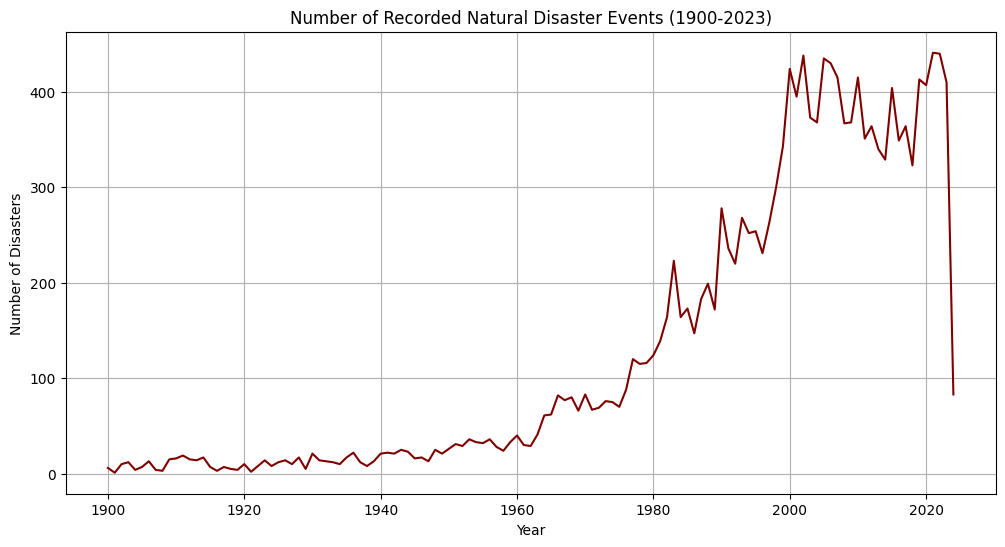

In [54]:
all_disasters_data = disaster_data[disaster_data['Entity'] == 'All disasters']

plt.figure(figsize=(12, 6))
plt.plot(all_disasters_data['Year'], all_disasters_data['Disasters'], color='maroon')
plt.title('Number of Recorded Natural Disaster Events (1900-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.grid(True)
plt.show()

# Global Number of Reported Disasters by Type per Decade

In [77]:
new_data.loc[:,'Decade'] = (new_data['Year'] // 10) * 10

type_by_decade = new_data.groupby(['Decade', 'Entity'])['Disasters'].sum().unstack().fillna(0)

type_by_decade.head(15)

Entity,Drought,Dry mass movement,Earthquake,Extreme temperature,Extreme weather,Flood,Fog,Glacial lake outburst flood,Volcanic activity,Wet mass movement,Wildfire
Decade,,,,,,,,,,,
1900.0,5.0,3.0,38.0,0.0,14.0,6.0,0.0,0.0,8.0,1.0,0.0
1910.0,46.0,0.0,32.0,0.0,18.0,4.0,0.0,0.0,3.0,2.0,2.0
1920.0,8.0,0.0,42.0,0.0,34.0,9.0,0.0,0.0,1.0,4.0,2.0
1930.0,14.0,1.0,65.0,2.0,39.0,11.0,0.0,0.0,3.0,6.0,1.0
1940.0,50.0,0.0,73.0,0.0,55.0,11.0,0.0,0.0,7.0,4.0,4.0
1950.0,0.0,1.0,68.0,8.0,119.0,81.0,1.0,0.0,9.0,20.0,1.0
1960.0,57.0,2.0,88.0,9.0,211.0,157.0,0.0,0.0,12.0,26.0,6.0
1970.0,135.0,0.0,110.0,15.0,274.0,260.0,0.0,0.0,23.0,55.0,7.0
1980.0,229.0,14.0,173.0,37.0,534.0,516.0,0.0,0.0,31.0,105.0,49.0


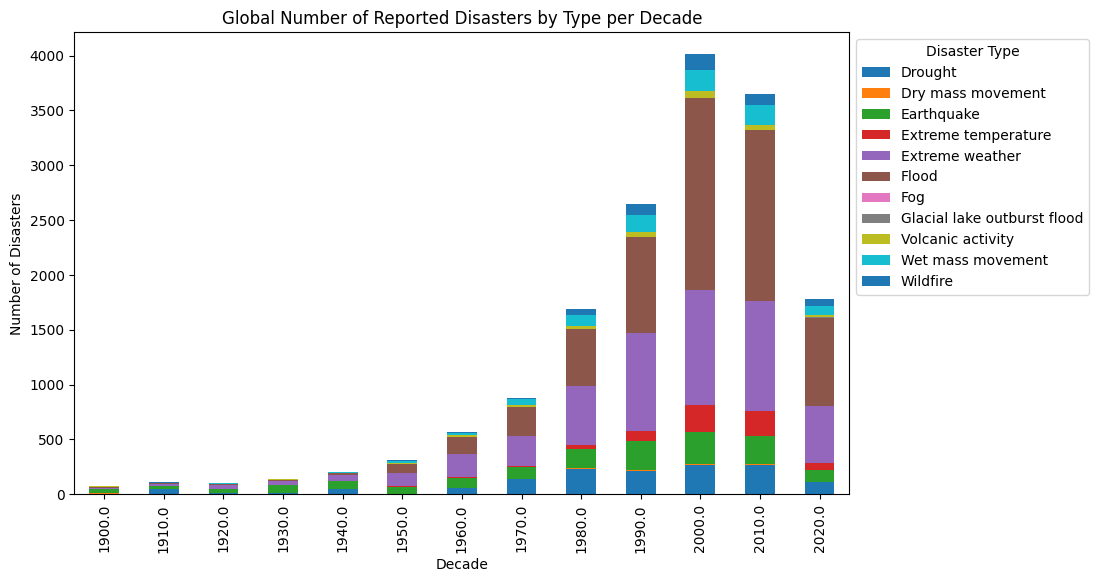

In [78]:
type_by_decade.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Global Number of Reported Disasters by Type per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Disasters')
plt.legend(title='Disaster Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# Most common disaster over the time

In [79]:
total_by_type = new_data.groupby('Entity')['Disasters'].sum().sort_values(ascending=False)
total_by_type.head(15)

Entity
Flood                          6044.0
Extreme weather                4765.0
Earthquake                     1618.0
Drought                        1400.0
Wet mass movement               831.0
Extreme temperature             694.0
Wildfire                        481.0
Volcanic activity               279.0
Dry mass movement                45.0
Glacial lake outburst flood       4.0
Fog                               1.0
Name: Disasters, dtype: float64

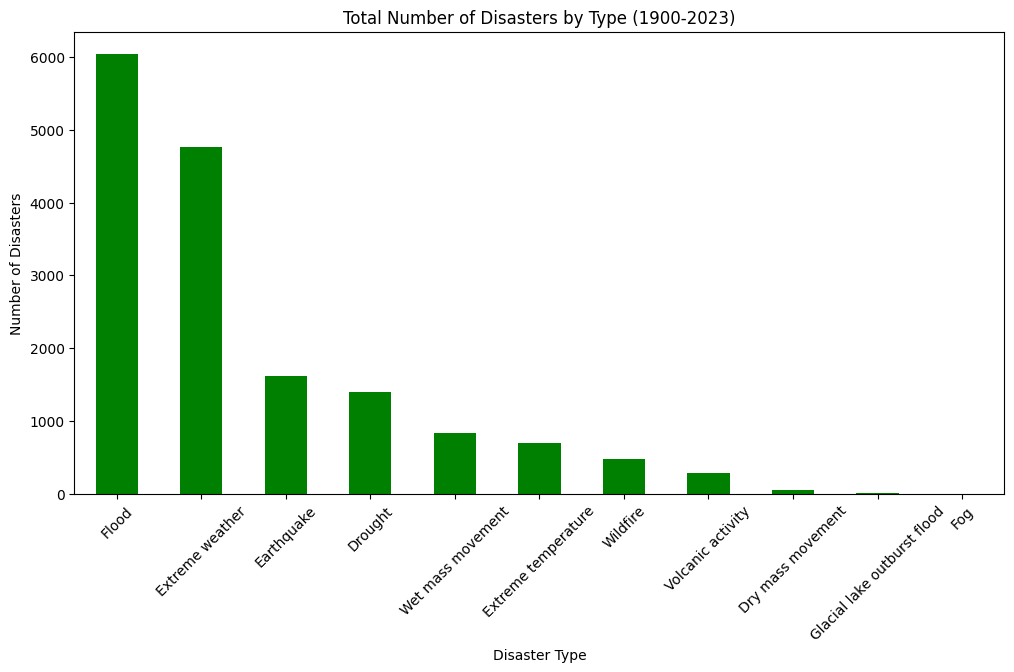

In [80]:
plt.figure(figsize=(12, 6))
total_by_type.plot(kind='bar', color='green')
plt.title('Total Number of Disasters by Type (1900-2023)')
plt.xlabel('Disaster Type')
plt.ylabel('Number of Disasters')
plt.xticks(rotation=45)
plt.show()

# Specific disaster trend analysis 

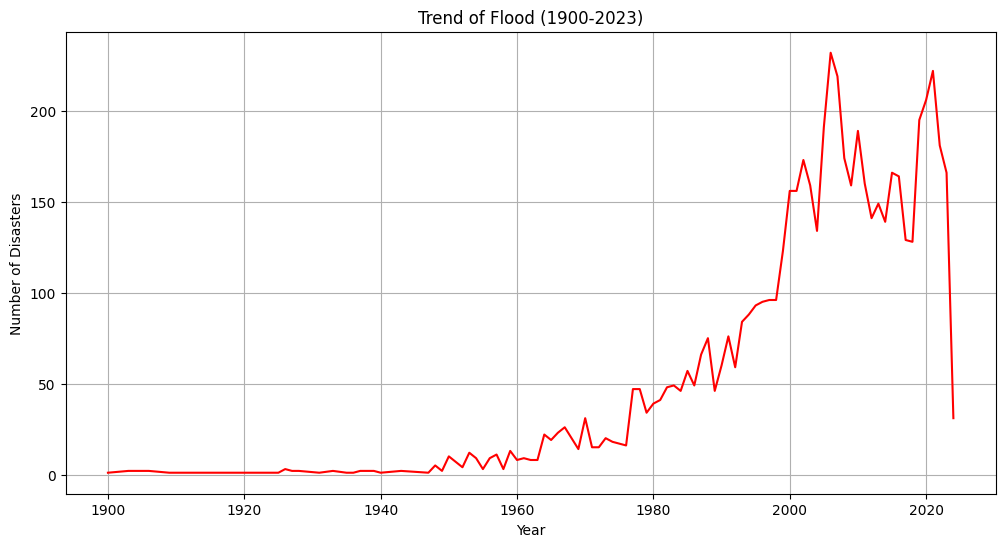

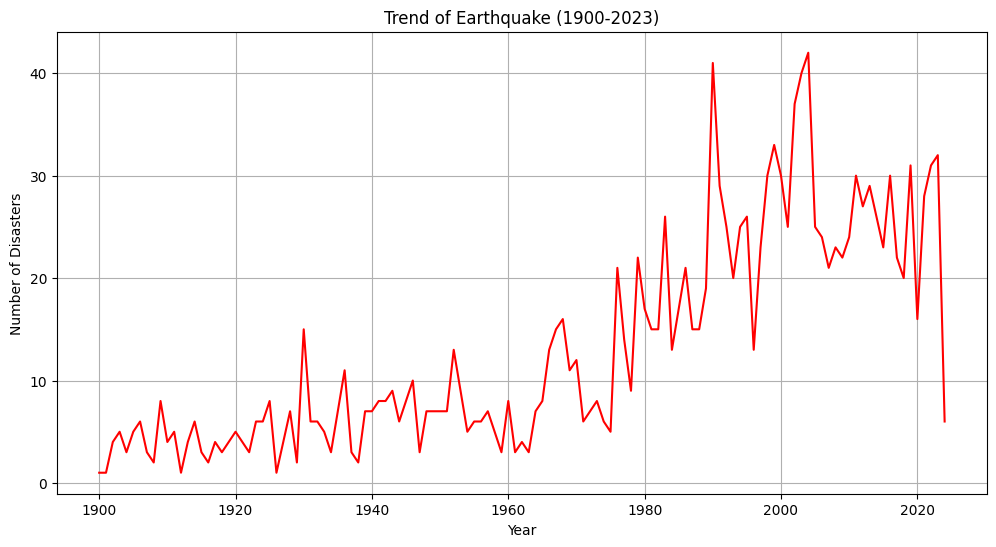

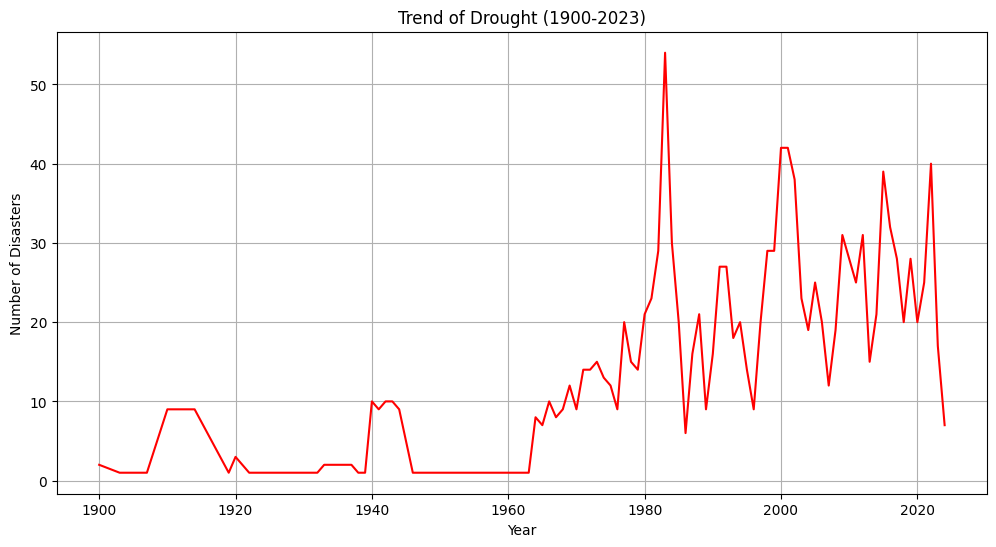

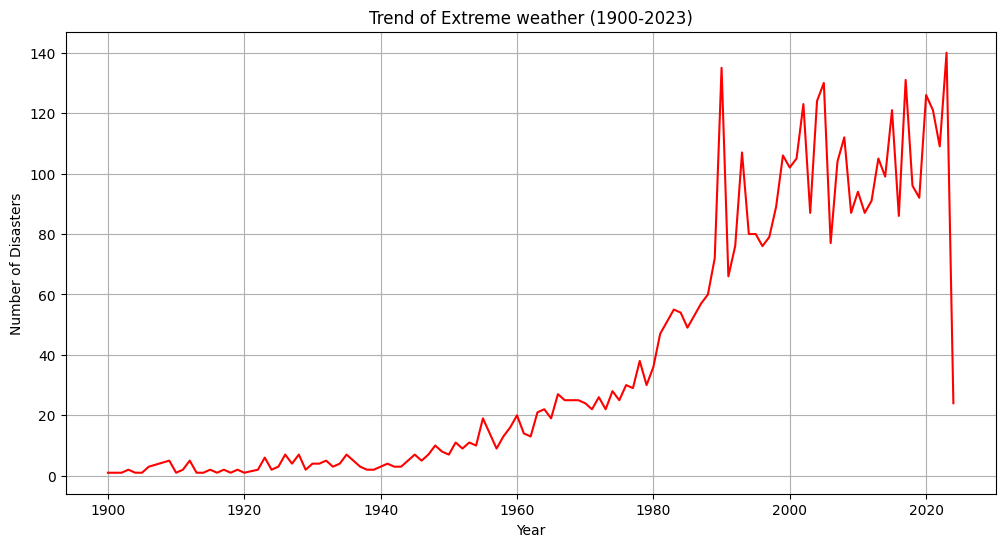

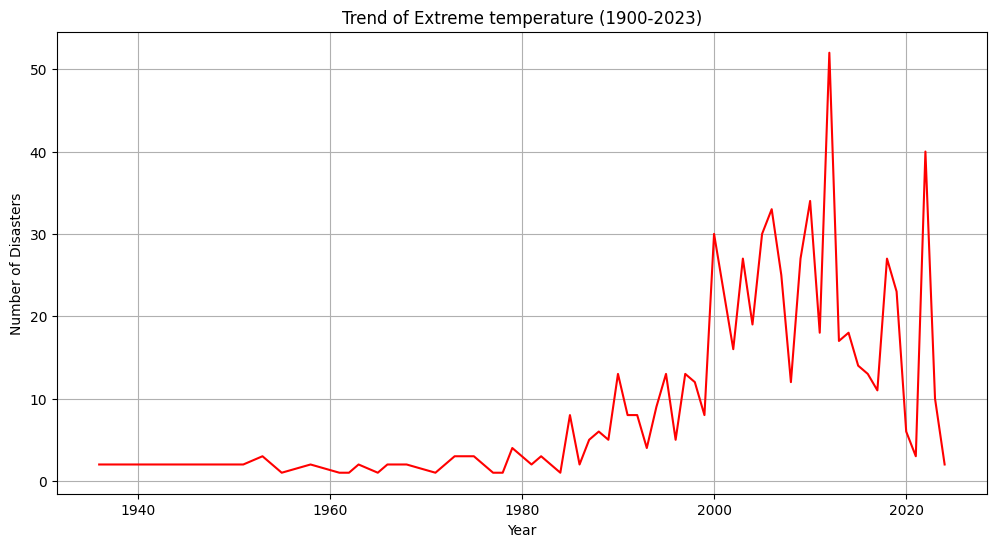

In [81]:
def plot_disaster_trend(disaster_type):
    data = new_data[new_data['Entity'] == disaster_type]
    plt.figure(figsize=(12, 6))
    plt.plot(data['Year'], data['Disasters'], color='red')
    plt.title(f'Trend of {disaster_type} (1900-2023)')
    plt.xlabel('Year')
    plt.ylabel('Number of Disasters')
    plt.grid(True)
    plt.show()

for disaster_type in ['Flood', 'Earthquake', 'Drought', 'Extreme weather', 'Extreme temperature']:
    plot_disaster_trend(disaster_type)

# Seasonal Analysis

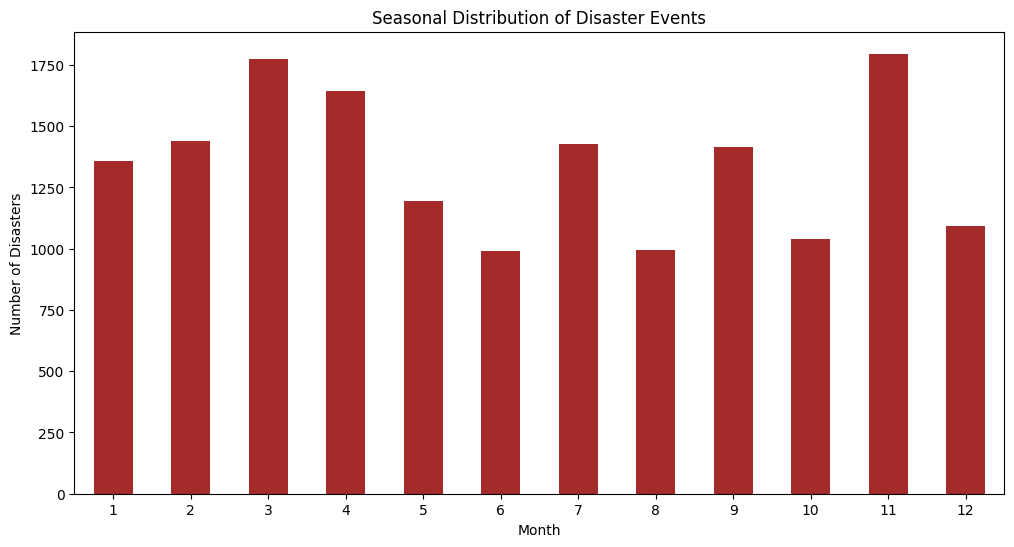

In [96]:
np.random.seed(0)
new_data.loc[:,'Month'] = np.random.randint(1, 13, new_data.shape[0])

monthly_data = new_data.groupby('Month')['Disasters'].sum()

plt.figure(figsize=(12, 6))
monthly_data.plot(kind='bar', color='brown')
plt.title('Seasonal Distribution of Disaster Events')
plt.xlabel('Month')
plt.ylabel('Number of Disasters')
plt.xticks(rotation=0)
plt.show()